In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
train.shape

(6500, 20)

In [4]:
train.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('test.csv')
test.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


In [7]:
test.shape

(3500, 19)

In [8]:
test.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

In [9]:
train['Artist Name'].nunique()

6449

In [10]:
train['Material'].value_counts()

Brass        847
Aluminium    845
Bronze       821
Marble       819
Clay         816
Wood         816
Stone        772
Name: Material, dtype: int64

In [11]:
train['Transport'].value_counts()

Roadways     2064
Airways      1817
Waterways    1227
Name: Transport, dtype: int64

In [12]:
train['Remote Location'].value_counts()

No     4594
Yes    1135
Name: Remote Location, dtype: int64

In [13]:
x = ['Artist Reputation', 'Height', 'Width', 'Weight']
for i in x:
    train[i] = train[i].fillna(format(np.round(train[i].mean(),2)))
    test[i] = test[i].fillna(format(np.round(test[i].mean(),2)))

In [14]:
x = ['Artist Reputation', 'Height', 'Width', 'Weight']
for i in x:
    train[i] = train[i].astype(float)
    test[i] = test[i].astype(float)

In [15]:
train['Total_Area'] = train['Height']*train['Width']
test['Total_Area'] = test['Height']*test['Width']

In [16]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Total_Area
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.00,4128.00,Brass,13.91,16.27,Yes,...,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29,102.00
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.00,61.00,Brass,6.83,15.00,No,...,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96,9.00
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.00,237.00,Clay,4.96,21.18,No,...,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29,40.00
3,fffe350031003300,Robert Chaires,0.12,9.0,9.62,400694.82,Aluminium,5.81,16.31,No,...,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16,86.58
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.00,324.00,Aluminium,3.18,11.94,Yes,...,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23,102.00


In [17]:
train['Material']= train['Material'].fillna(train['Material'].value_counts().index[0])
x = ['Material', 'Transport', 'Remote Location']
for i in x:
    train[i] = train[i].fillna(train[i].value_counts().index[0])

In [18]:
test['Transport'] = train['Transport'].fillna(train['Transport'].value_counts().index[0])

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 21 columns):
Customer Id              6500 non-null object
Artist Name              6500 non-null object
Artist Reputation        6500 non-null float64
Height                   6500 non-null float64
Width                    6500 non-null float64
Weight                   6500 non-null float64
Material                 6500 non-null object
Price Of Sculpture       6500 non-null float64
Base Shipping Price      6500 non-null float64
International            6500 non-null object
Express Shipment         6500 non-null object
Installation Included    6500 non-null object
Transport                6500 non-null object
Fragile                  6500 non-null object
Customer Information     6500 non-null object
Remote Location          6500 non-null object
Scheduled Date           6500 non-null object
Delivery Date            6500 non-null object
Customer Location        6500 non-null object
Cost         

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 20 columns):
Customer Id              3500 non-null object
Artist Name              3500 non-null object
Artist Reputation        3500 non-null float64
Height                   3500 non-null float64
Width                    3500 non-null float64
Weight                   3500 non-null float64
Material                 3500 non-null object
Price Of Sculpture       3500 non-null float64
Base Shipping Price      3500 non-null float64
International            3500 non-null object
Express Shipment         3500 non-null object
Installation Included    3500 non-null object
Transport                3500 non-null object
Fragile                  3500 non-null object
Customer Information     3500 non-null object
Remote Location          3500 non-null object
Scheduled Date           3500 non-null object
Delivery Date            3500 non-null object
Customer Location        3500 non-null object
Total_Area   

In [21]:
newtrain = train
newtest = test

In [22]:
x = ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information',
     'Remote Location']

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [25]:
import datetime as dt

In [26]:
newtrain['Scheduled Date'] = pd.to_datetime(newtrain['Scheduled Date'])
newtest['Scheduled Date'] = pd.to_datetime(newtest['Scheduled Date'])

In [27]:
newtrain['Delivery Date'] = pd.to_datetime(newtrain['Delivery Date'])
newtest['Scheduled Date'] = pd.to_datetime(newtest['Scheduled Date'])

In [28]:
newtrain['ScheduleDate'] = newtrain['Scheduled Date'].dt.day
newtrain['ScheduleMonth'] = newtrain['Scheduled Date'].dt.month
newtrain['ScheduleYear'] = newtrain['Scheduled Date'].dt.year
newtest['ScheduleDate'] = newtest['Scheduled Date'].dt.day
newtest['ScheduleMonth'] = newtest['Scheduled Date'].dt.month
newtest['ScheduleYear'] = newtest['Scheduled Date'].dt.year

In [29]:
newtrain['Delivery Date'] = pd.to_datetime(newtrain['Delivery Date'])
newtest['Delivery Date'] = pd.to_datetime(newtest['Delivery Date'])

In [30]:
newtrain['DeliveryDate'] = newtrain['Delivery Date'].dt.day
newtrain['DeliveryMonth'] = newtrain['Delivery Date'].dt.month
newtrain['DeliveryYear'] = newtrain['Delivery Date'].dt.year
newtest['DeliveryDate'] = newtest['Delivery Date'].dt.day
newtest['DeliveryMonth'] = newtest['Delivery Date'].dt.month
newtest['DeliveryYear'] = newtest['Delivery Date'].dt.year

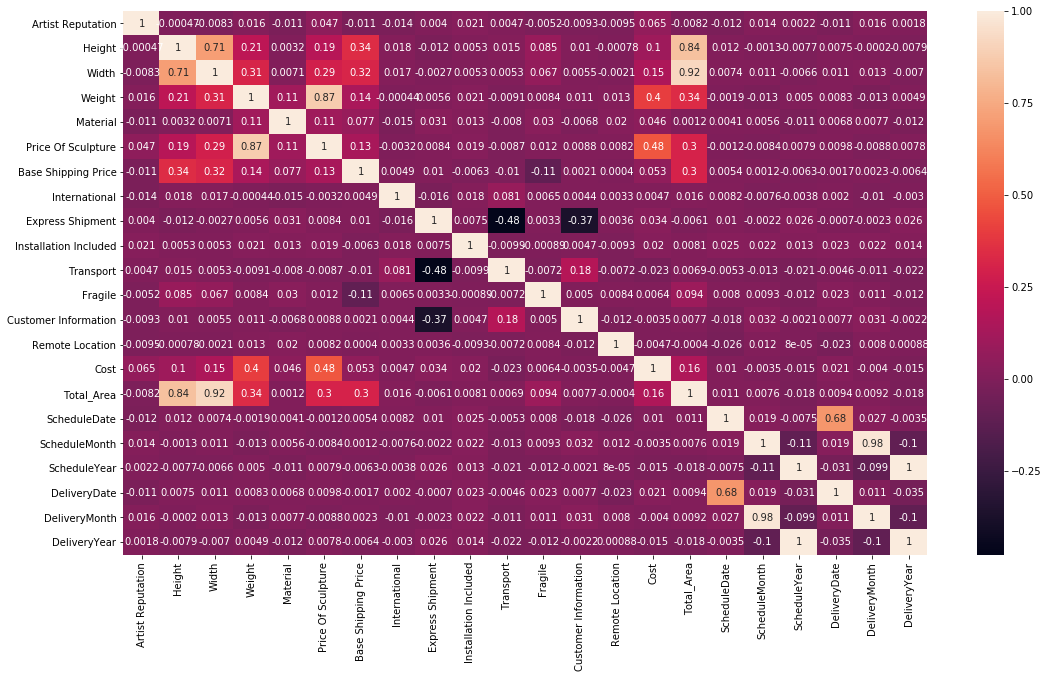

In [41]:
plt.figure(figsize=(18, 10))
sns.heatmap(newtrain.corr(), annot= True)

In [32]:
newtrain = newtrain.drop(['Scheduled Date', 'Delivery Date', 'Customer Location', 'Customer Id', 'Artist Name'], axis = 1)
newtest = newtest.drop(['Scheduled Date', 'Delivery Date', 'Customer Location', 'Customer Id', 'Artist Name'], axis = 1)

In [33]:
x = newtrain.drop('Cost', axis = 1)
y = newtrain['Cost']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

79236.41862557619


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

181798.11759395053


In [38]:
test = test.rename({'Customer Id': 'Id'}, axis = 1)
test.head(2)

,Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Scheduled Date,Delivery Date,Customer Location,Total_Area,ScheduleDate,ScheduleMonth,ScheduleYear,DeliveryDate,DeliveryMonth,DeliveryYear
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,6,5.98,19.11,1,...,2017-07-03,2017-07-06,"Santoshaven, IA 63481",954.0,3,7,2017,6,7,2017
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,3,6.92,13.96,0,...,2016-05-02,2016-05-02,"Ericksonton, OH 98253",28.0,2,5,2016,2,5,2016


In [39]:
x_train = newtrain.drop('Cost', axis = 1)
y_train = newtrain['Cost']
x_test = newtest

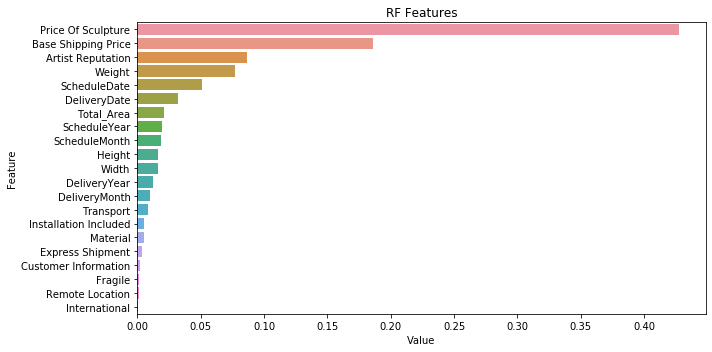

In [40]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [45]:
x_train = newtrain.drop(['Cost', 'Fragile', 'Remote Location', 'International', 'Customer Information', 'Express Shipment', 'Material'], axis = 1)
y_train = newtrain['Cost']
x_test = newtest.drop(['Fragile', 'Remote Location', 'International', 'Customer Information', 'Express Shipment', 'Material'], axis = 1)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Customer Id': test.Id, 'Cost': np.abs(y_pred)})
solution.to_csv('Solution1.csv', index = False)